In [1]:
from datasets import load_dataset

import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from pythainlp.corpus import thai_stopwords
from PIL import Image

In [32]:
data_files = {"train": "./LimeSoda/dataset_train_wo_tokentags_v1/train_v1.jsonl", "test": "./LimeSoda/dataset_train_wo_tokentags_v1/test_v1.jsonl"}

In [33]:
fake_news_dataset = load_dataset("json", data_files=data_files)

Using custom data configuration default-9a5dada4d8c9372c


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetGenerationError: An error occurred while generating the dataset

In [3]:
fake_news_dataset

DatasetDict({
    train: Dataset({
        features: ['Text', 'Document Tag'],
        num_rows: 2698
    })
})

In [4]:
ex_1 = fake_news_dataset['train'][0]['Text']
ex_1

['เพื่อน',
 'ๆ',
 '',
 '',
 'รู้',
 'ไหม',
 'ครับ',
 'ว่า',
 '',
 '',
 '"',
 'การ',
 'ล้าง',
 'มือ',
 '"',
 '',
 '',
 'มี',
 'ความ',
 'สำคัญ',
 'และ',
 'มี',
 'ส่วน',
 'ช่วย',
 'ใน',
 'การ',
 'ป้องกัน',
 '',
 '',
 'COVID',
 '-',
 '19',
 '',
 '',
 'ได้',
 'อีก',
 'ด้วย',
 '',
 '',
 'ตาม',
 'มา',
 'อ่าน',
 'ไป',
 'พร้อม',
 'กัน',
 'เลย',
 'ครับ']

In [5]:
text = ""
for word in ex_1:
    text += word
text

'เพื่อนๆรู้ไหมครับว่า"การล้างมือ"มีความสำคัญและมีส่วนช่วยในการป้องกันCOVID-19ได้อีกด้วยตามมาอ่านไปพร้อมกันเลยครับ'

In [6]:
import string
text2 = ""
for word in ex_1:
    if word not in thai_stopwords() and word not in string.punctuation:
        text2 += word
text2

'เพื่อนรู้ไหมล้างมือป้องกันCOVID19อ่าน'

In [19]:
def normalize_quote(text: str):
    all_quote = [
    '“', # U+201c
    '”', # U+201d
    '«', # U+00AB
    '»', # U+00BB
    '„', # U+201E
    '“', # U+201C
    '‟', # U+201F
    '”', # U+201D
    '❝', # U+275D
    '❞', # U+275E
    '〝', # U+301D
    '〞', # U+301E
    '〟', # U+301F
    '＂', # U+FF02
    ]
    std_quote = "\"" #U+0022
    table = str.maketrans(dict.fromkeys(all_quote, std_quote))
    return text.translate(table)

In [34]:
import unicodedata
from pythainlp.util import normalize
def preprocess_func(example):
    new_text = []
    for word in example['Text']:
        new_word = unicodedata.normalize('NFKD', word)
        new_word = normalize(new_word)
        new_word = normalize_quote(new_word)
        new_text.append(new_word)
    example['Text'] = new_text
    return example

In [35]:
import nltk
total_words = []
process_fake_data = fake_news_dataset.map(preprocess_func)
for news in process_fake_data['train']['Text']:
    for word in news:
        if word not in thai_stopwords() and word not in string.punctuation and word != ' ':
            total_words.append(word)
word_fq = nltk.FreqDist(total_words)
mostcommon = word_fq.most_common(100)
mostcommon

  0%|          | 0/2698 [00:00<?, ?ex/s]

[('1', 4771),
 ('2', 4155),
 ('3', 3333),
 ('5', 2329),
 ('4', 2044),
 ('|||', 1927),
 ('..', 1428),
 ('6', 1224),
 ('10', 1219),
 ('8', 1182),
 ('7', 1158),
 ('19', 1108),
 ('9', 765),
 ('...', 763),
 ('0', 741),
 ('E0', 691),
 ('30', 596),
 ('20', 526),
 ('15', 518),
 ('000', 413),
 ('12', 360),
 ('%E', 359),
 ('caption', 353),
 ('%E0', 344),
 ('14', 339),
 ('100', 320),
 ('%B8', 294),
 ('%B8%', 287),
 ('11', 272),
 ('13', 269),
 ('B', 260),
 ('50', 252),
 ('Advertisement', 249),
 ('attachment_', 229),
 ('aligncenter', 229),
 ('width=', 229),
 ('id=', 220),
 ('align=', 220),
 ('%B', 219),
 ('jpg', 214),
 ('40', 206),
 ('60', 204),
 ('00', 203),
 ('s', 192),
 ('25', 190),
 ('80', 189),
 ('24', 181),
 ('n', 180),
 ('2563', 175),
 ('18', 171),
 ('2019', 168),
 ('function', 160),
 ('16', 159),
 ('90', 158),
 ('\\n', 146),
 ('E', 142),
 ('COVID', 140),
 ('A', 140),
 ('%B9', 140),
 ('500', 137),
 ('17', 133),
 ('22', 125),
 ('session', 124),
 ('70', 121),
 ('o', 117),
 ('com', 116),
 ('99'

In [26]:
most_common_text, _ = zip(*mostcommon)
most_common_text

('ทำ',
 'โรค',
 'น้ำ',
 'อาการ',
 'คน',
 'ดี',
 'อาหาร',
 'ยา',
 '1',
 'รักษา',
 'ตัว',
 '2',
 'เชื้อ',
 'ลด',
 'ร่างกาย',
 'ป่วย',
 'กิน',
 'ดื่ม',
 '3',
 'เลือด',
 'ใบ',
 'สาร',
 'ติด',
 'แก้',
 'งาน',
 'ป้องกัน',
 'มะเร็ง',
 'แพทย์',
 '5',
 'วิธี',
 'ปวด',
 'เวลา',
 'สุขภาพ',
 '4',
 '|||',
 'ชนิด',
 'ปี',
 'รับประทาน',
 'สี',
 'ต้น',
 'ปกติ',
 'ไข้',
 'เรื่อง',
 'ประโยชน์',
 'นอน',
 'ใส่',
 'สำหรับ',
 'ชีวิต',
 'สมุนไพร',
 'ข้อ',
 'เสี่ยง',
 'หน้า',
 'ระบบ',
 'มือ',
 'อักเสบ',
 'ล้าง',
 'ต้ม',
 'ผสม',
 'หัวใจ',
 'สะอาด',
 'ไทย',
 'เด็ก',
 'ประจำ',
 'ตา',
 'บ้าน',
 'ร้อน',
 'ไวรัส',
 'ทาน',
 'รู้',
 'ตรวจ',
 'ลำ',
 'ปัญหา',
 'ดู',
 'ดอก',
 'ท้อง',
 '6',
 '10',
 'ลูก',
 'น้ำตาล',
 '–',
 '8',
 'ข้อมูล',
 'ผิว',
 '7',
 'ไขมัน',
 'พิษ',
 'สรรพคุณ',
 'กาย',
 'แนะนำ',
 'เนื้อ',
 '19',
 'หาย',
 'สูตร',
 'โลหิต',
 'ภาวะ',
 'อายุ',
 'บำรุง',
 'เครื่อง',
 'เย็น',
 'มะนาว')

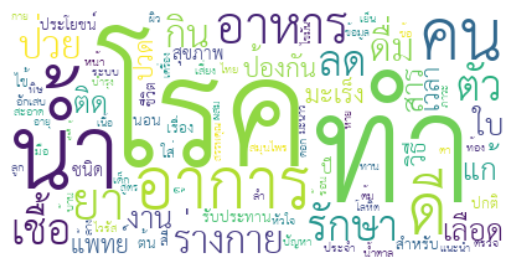

In [27]:
wordcloud = WordCloud(
    font_path="./THSarabunNew/THSarabunNew.ttf",
    stopwords= ' '.join(thai_stopwords()) + ' ' + ' '.join(string.punctuation),
    background_color="white",
    regexp= r"[ก-๙a-zA-Z']+",
).generate(' '.join(list(most_common_text)))
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
fake_news_dataset_test = load_dataset("json", data_files="./LimeSoda/dataset_train_wo_tokentags_v1/test_v1.jsonl", )

Using custom data configuration default-c977a7fc8b1d2339


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to C:/Users/foofo/.cache/huggingface/datasets/json/default-c977a7fc8b1d2339/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
fake_news_dataset_test

DatasetDict({
    train: Dataset({
        features: ['Text', 'Token Tags', 'Document Tag'],
        num_rows: 2765
    })
})

In [ ]:
ex_2 = fake_news_dataset_test[]